In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://s3.amazonaws.com/vbgov-ckan-open-data/EMS+Calls+For+Service.csv'
df = pd.read_csv(url)
df.shape

(326609, 12)

In [3]:
df.columns.tolist()

['EMS Call Number',
 'Block Address',
 'City',
 'State',
 'Call Priority',
 'Rescue Squad Number',
 'Call Date and Time',
 'Entry Date and Time',
 'Dispatch Date and Time',
 'En route Date and Time',
 'On Scene Date and Time',
 'Close Date and Time']

In [4]:
response_squad_num = list(set((df['Rescue Squad Number'].tolist())))
len(response_squad_num)

758

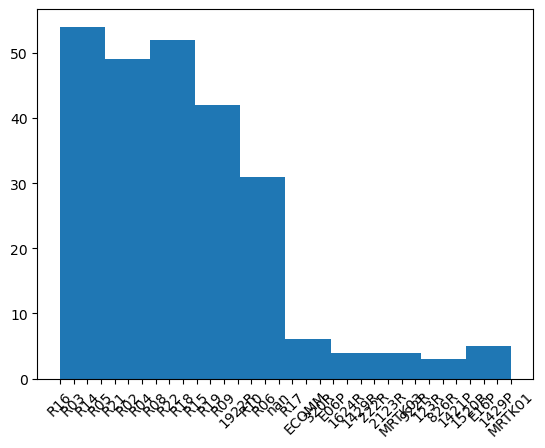

In [5]:
plt.hist(df.tail(250)['Rescue Squad Number'].tolist())
plt.xticks(rotation=45)
plt.show()

In [6]:
df['contain_r'] = ''
df.tail()

,EMS Call Number,Block Address,City,State,Call Priority,Rescue Squad Number,Call Date and Time,Entry Date and Time,Dispatch Date and Time,En route Date and Time,On Scene Date and Time,Close Date and Time,contain_r
326604,180009997,100 INDIAN LAKES BL/PLEASANT VALLEY,Virginia Beach,VA,1,R19,2018-02-27 03:30:19,2018-02-27 03:30:58,2018-02-27 03:31:11,2018-02-27 03:32:50,2018-02-27 03:36:31,2018-02-27 04:38:47,
326605,180009998,800 QUESNEL DR,Virginia Beach,VA,2,R21,2018-02-27 04:00:48,2018-02-27 04:03:52,2018-02-27 04:04:00,2018-02-27 04:05:10,2018-02-27 04:14:37,2018-02-27 05:15:41,
326606,180009999,3500 CHIMNEY HILL CT,Virginia Beach,VA,2,R16,2018-02-27 04:31:17,2018-02-27 04:33:36,2018-02-27 04:33:43,2018-02-27 04:34:56,2018-02-27 04:48:45,2018-02-27 04:49:05,
326607,180010000,700 PROSPECT CT,Virginia Beach,VA,1,R02,2018-02-27 04:51:34,2018-02-27 04:53:04,2018-02-27 04:53:15,2018-02-27 04:53:56,2018-02-27 05:00:43,2018-02-27 05:56:45,
326608,180010002,5500 INDIAN RIVER RD,Virginia Beach,VA,2,R10,2018-02-27 05:40:04,2018-02-27 05:42:18,2018-02-27 05:42:27,2018-02-27 05:51:20,2018-02-27 06:00:41,2018-02-27 07:34:45,


In [7]:
test = 'RMC'

def contains_r(s):
    try:
        return int(s.lower().find('r'))
    except:
        return int(-1)
    
df['contain_r'] = df['Rescue Squad Number'].apply(contains_r)

df_filter_r_none = df[df['contain_r'] == -1]
df_filter_r_0 = df[df['contain_r'] == 0]
df_filter_r_1 = df[df['contain_r'] == 1]
df_filter_r_2 = df[df['contain_r'] == 2]
df_filter_r_3 = df[df['contain_r'] == 3]
df_filter_r_4 = df[df['contain_r'] == 4]
df_filter_r_5 = df[df['contain_r'] == 5]
df_filter_r_6 = df[df['contain_r'] == 6]

list_of_pos = [df_filter_r_none, df_filter_r_0, 
               df_filter_r_1, df_filter_r_2, 
               df_filter_r_3, df_filter_r_4, 
               df_filter_r_5, df_filter_r_6]

total = 0
for idx, each in enumerate(list_of_pos):
    total += each.shape[0]
    print('R in Position {} // Total Entries: {}'.format(idx, each.shape[0]))
print('***Total Entries: {}***'.format(total))

R in Position 0 // Total Entries: 25053
R in Position 1 // Total Entries: 274875
R in Position 2 // Total Entries: 666
R in Position 3 // Total Entries: 206
R in Position 4 // Total Entries: 12614
R in Position 5 // Total Entries: 12933
R in Position 6 // Total Entries: 262
R in Position 7 // Total Entries: 0
***Total Entries: 326609***


In [8]:
set(df_filter_r_1['Rescue Squad Number'].tolist())

{'BRIG03',
 'BRIG04',
 'BRIG05',
 'BRIG06',
 'BRIG07',
 'BRIG08',
 'BRIG09',
 'BRIG10',
 'BRU06',
 'BRU08',
 'BRU09',
 'BRU13',
 'FR01P',
 'FR02',
 'FR02P',
 'FRSQ1P',
 'MR01',
 'MR02',
 'MR22',
 'MR23',
 'MRT',
 'MRTK01',
 'MRTK02',
 'MRTK03',
 'MRTK04',
 'MRTK05',
 'NR15',
 'NR16',
 'NR17',
 'NR17P',
 'NR31',
 'NR31P',
 'NR32',
 'NR32P',
 'NR34'}

In [9]:
df_filter_r_0.shape[0] / df.shape[0]

0.841602650263771